In [15]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential,layers
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn import preprocessing as p
import warnings
warnings.filterwarnings('ignore')
np.random.seed(1000)

In [ ]:
df_total = pd.read_excel('weather_2011-2021_Romania.xlsx')
df_total.head()

In [ ]:
df = df_total[df_total['Address'] == 'Bucharest, Romania']
df.head()

In [2]:
df = pd.read_excel('Bucharest_weather_2011_2022.xlsx')
df.head()

,Address,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,...,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Latitude,Longitude,Resolved Address,Name,Info,Conditions
0,"Bucharest, Romania",01/01/2011,-9.5,-1.4,-6.5,-7.5,93.08,NaN,11.7,10.8,...,3.0,15.7,1018.2,"Mist, Fog, Smoke Or Haze",44.4343,26.103,"Bucure<U+0219>ti, Rom穗ia","Bucure<U+0219>ti, Rom穗ia",NaN,Clear
1,"Bucharest, Romania",01/02/2011,-9.3,-0.9,-5.3,-7.1,87.33,NaN,10.2,7.2,...,3.8,11.0,1014.7,Mist,44.4343,26.103,"Bucure<U+0219>ti, Rom穗ia","Bucure<U+0219>ti, Rom穗ia",NaN,Clear
2,"Bucharest, Romania",01/03/2011,-4.6,-0.9,-1.9,-2.8,93.12,NaN,18.9,21.6,...,2.4,88.5,1018.5,"Mist, Light Snow, Fog, Snow",44.4343,26.103,"Bucure<U+0219>ti, Rom穗ia","Bucure<U+0219>ti, Rom穗ia",NaN,Overcast
3,"Bucharest, Romania",01/04/2011,-9.5,-0.6,-4.9,-5.4,96.53,NaN,12.1,10.8,...,2.3,51.6,1025.2,"Mist, Light Snow, Fog, Snow",44.4343,26.103,"Bucure<U+0219>ti, Rom穗ia","Bucure<U+0219>ti, Rom穗ia",NaN,Partially cloudy
4,"Bucharest, Romania",01/05/2011,-7.7,-5.9,-7.0,-7.5,96.63,NaN,10.3,7.2,...,1.7,77.2,1028.7,"Mist, Light Snow, Fog, Sky Coverage Increasing...",44.4343,26.103,"Bucure<U+0219>ti, Rom穗ia","Bucure<U+0219>ti, Rom穗ia",NaN,Overcast


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Address              4018 non-null   object 
 1   Date time            4018 non-null   object 
 2   Minimum Temperature  4018 non-null   float64
 3   Maximum Temperature  4018 non-null   float64
 4   Temperature          4018 non-null   float64
 5   Dew Point            4018 non-null   float64
 6   Relative Humidity    4018 non-null   float64
 7   Heat Index           1110 non-null   float64
 8   Wind Speed           4018 non-null   float64
 9   Wind Gust            3019 non-null   float64
 10  Wind Direction       4018 non-null   float64
 11  Wind Chill           1929 non-null   float64
 12  Precipitation        4018 non-null   float64
 13  Precipitation Cover  4018 non-null   float64
 14  Snow Depth           2321 non-null   float64
 15  Visibility           4018 non-null   f

In [4]:
df.describe()

,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,Wind Direction,Wind Chill,Precipitation,Precipitation Cover,Snow Depth,Visibility,Cloud Cover,Sea Level Pressure,Latitude,Longitude,Info
count,4018.000000,4018.00000,4018.000000,4018.000000,4018.000000,1110.000000,4018.000000,3019.000000,4018.000000,1929.000000,4018.000000,4018.000000,2321.000000,4018.000000,4018.000000,4018.000000,4.018000e+03,4.018000e+03,0.0
mean,7.666625,17.98009,12.532927,6.931857,73.181536,30.679459,12.569612,24.840079,154.011598,-0.843650,1.203178,6.026220,2.612611,9.040567,48.745545,1017.185017,4.443430e+01,2.610300e+01,NaN
std,8.309835,10.90723,9.426328,7.463636,14.938255,3.011836,6.009783,14.761705,71.308511,6.415301,4.407678,13.033374,7.490918,1.976140,31.267542,7.461032,7.106312e-15,3.553156e-15,NaN
min,-21.900000,-11.10000,-16.000000,-18.400000,30.030000,26.100000,3.600000,3.600000,23.790000,-25.700000,0.000000,0.000000,0.000000,0.000000,0.000000,989.500000,4.443430e+01,2.610300e+01,NaN
25%,1.100000,8.92500,4.800000,1.300000,61.432500,28.200000,8.000000,14.400000,85.600000,-4.600000,0.000000,0.000000,0.000000,9.125000,21.900000,1012.200000,4.443430e+01,2.610300e+01,NaN
50%,7.900000,18.80000,12.900000,7.500000,73.265000,30.050000,11.300000,21.600000,155.450000,-0.300000,0.000000,0.000000,0.000000,10.000000,47.000000,1016.500000,4.443430e+01,2.610300e+01,NaN
75%,14.900000,27.40000,20.900000,13.200000,85.665000,32.700000,15.300000,28.800000,224.410000,4.200000,0.000000,4.170000,0.980000,10.000000,75.500000,1022.000000,4.443430e+01,2.610300e+01,NaN
max,25.100000,40.10000,30.900000,23.400000,99.950000,45.600000,48.900000,144.000000,313.290000,9.700000,67.630000,100.000000,62.590000,13.900000,100.000000,1042.600000,4.443430e+01,2.610300e+01,NaN


In [5]:
df.isnull().sum()

Address                   0
Date time                 0
Minimum Temperature       0
Maximum Temperature       0
Temperature               0
Dew Point                 0
Relative Humidity         0
Heat Index             2908
Wind Speed                0
Wind Gust               999
Wind Direction            0
Wind Chill             2089
Precipitation             0
Precipitation Cover       0
Snow Depth             1697
Visibility                0
Cloud Cover               0
Sea Level Pressure        0
Weather Type           1251
Latitude                  0
Longitude                 0
Resolved Address          0
Name                      0
Info                   4018
Conditions                0
dtype: int64

**Create a Separate Dataframe for Temperature**

In [6]:
df_all = df[['Date time','Temperature']]
df_all

,Date time,Temperature
0,01/01/2011,-6.5
1,01/02/2011,-5.3
2,01/03/2011,-1.9
3,01/04/2011,-4.9
4,01/05/2011,-7.0
...,...,...
4013,12/27/2021,-0.3
4014,12/28/2021,0.3
4015,12/29/2021,-0.7
4016,12/30/2021,0.9


In [7]:
train_index = int(df_all.shape[0] * 0.7)
test_index = int(train_index + df_all.shape[0] * 0.2)
print(train_index, test_index)

2812 3615


In [59]:
test_index - train_index

803

In [8]:
df_validation = df_all[test_index:]
df_validation

,Date time,Temperature
3615,11/24/2020,5.3
3616,11/25/2020,4.1
3617,11/26/2020,2.4
3618,11/27/2020,1.2
3619,11/28/2020,-0.4
...,...,...
4013,12/27/2021,-0.3
4014,12/28/2021,0.3
4015,12/29/2021,-0.7
4016,12/30/2021,0.9


In [9]:
df_tem =df_all[:test_index]
df_tem

,Date time,Temperature
0,01/01/2011,-6.5
1,01/02/2011,-5.3
2,01/03/2011,-1.9
3,01/04/2011,-4.9
4,01/05/2011,-7.0
...,...,...
3610,11/19/2020,6.3
3611,11/20/2020,7.2
3612,11/21/2020,5.5
3613,11/22/2020,3.8


In [10]:
df_tem.isnull().sum()

Date time      0
Temperature    0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f845328f0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f845328f790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8453281d30>],
 'medians': [<matplotlib.lines.Line2D at 0x7f845328fe50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8453295190>],
 'means': []}

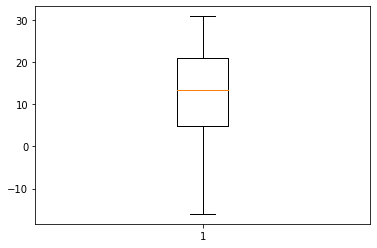

In [11]:
plt.boxplot(df_tem['Temperature'])

**Visualize the data**

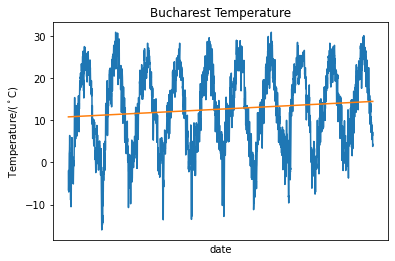

In [12]:

plt.plot(df_tem['Date time'],df_tem['Temperature'])
plt.title("Bucharest Temperature")
plt.xticks([])
plt.xlabel('date')
plt.ylabel('Temperature/($^\circ$C)')

time_list = list(range(df_tem['Date time'].shape[0]))
z = np.polyfit(time_list,df_tem['Temperature'],1)
p = np.poly1d(z)
plt.plot(time_list,p(time_list))


# plt.show();

**Prepare Data for Training**

In [13]:
df_tem_list = np.array(df_tem['Temperature'])
df_tem_list.shape
df_tem_list = df_tem_list.reshape(-1,1) # reshape to 2d
df_tem_list

array([[-6.5],
       [-5.3],
       [-1.9],
       ...,
       [ 5.5],
       [ 3.8],
       [ 4.3]])

In [16]:
# normalization data
min_max_scaler = p.MinMaxScaler()
normalizedData = min_max_scaler.fit_transform(df_tem_list)
normalizedData

array([[0.20255864],
       [0.22814499],
       [0.30063966],
       ...,
       [0.45842217],
       [0.42217484],
       [0.43283582]])

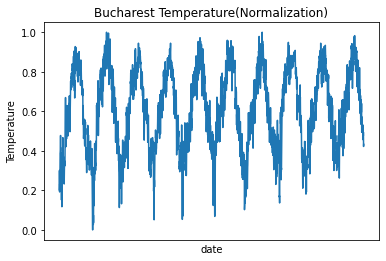

In [17]:
plt.plot(range(len(normalizedData)),normalizedData.flatten())
# plt.plot(df_tem['Temperature'])
plt.title("Bucharest Temperature(Normalization)")
plt.xticks([])
plt.xlabel('date')
plt.ylabel('Temperature')
plt.show();

In [ ]:
# rever normalizaed data to actual data
# reverseData = min_max_scaler.inverse_transform(normalizedData)
# reverseData

In [18]:
normalizedData = normalizedData.flatten() # flatten to 1d data
normalizedData

array([0.20255864, 0.22814499, 0.30063966, ..., 0.45842217, 0.42217484,
       0.43283582])

In [19]:
normalizedData.shape

(3615,)

In [20]:
def prepare_data(data,time_span=7):
    x,y = [],[]
    for i in range(data.shape[0]-time_span):
        x.append(list(data[i:i+time_span]))
        y.append(data[i+time_span])
    return np.array(x),np.array(y)

In [21]:
x,y = prepare_data(normalizedData)

In [22]:
x.shape

(3608, 7)

In [23]:
y.shape

(3608,)

In [24]:
split_index = train_index
xtrain , xtest, ytrain, ytest = x[:split_index], x[split_index:], y[:split_index], y[split_index:]
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((2812, 7), (796, 7), (2812,), (796,))

In [25]:
xtrain

array([[0.20255864, 0.22814499, 0.30063966, ..., 0.19189765, 0.23240938,
        0.20255864],
       [0.22814499, 0.30063966, 0.23667377, ..., 0.23240938, 0.20255864,
        0.26439232],
       [0.30063966, 0.23667377, 0.19189765, ..., 0.20255864, 0.26439232,
        0.36673774],
       ...,
       [0.78251599, 0.79104478, 0.78251599, ..., 0.79530917, 0.82089552,
        0.78891258],
       [0.79104478, 0.78251599, 0.7782516 , ..., 0.82089552, 0.78891258,
        0.75053305],
       [0.78251599, 0.7782516 , 0.79530917, ..., 0.78891258, 0.75053305,
        0.74413646]])

In [26]:
ytrain

array([0.26439232, 0.36673774, 0.33049041, ..., 0.75053305, 0.74413646,
       0.72707889])

In [ ]:
# patience to check how much epoch should be stop
early_stop = keras.callbacks.EarlyStopping(monitor='root_mean_squared_error', patience=10)

**Artificial Neural Network Model**

In [28]:
ann = Sequential(
                    [
                        layers.Dense(256,activation='sigmoid',input_shape=(7,)),
                        # layers.Dense(256,activation='tanh',input_shape=(7,)),
                        # layers.Dense(256,activation='tanh',input_shape=(7,)),
                        # layers.LSTM(256,activation='tanh',return_sequences=True,input_shape=(7,1)),
                        layers.Dropout(rate=0.4),
                        layers.Dense(1,activation='sigmoid')
                    ]
                )

ann.summary()


ann.compile(loss='mean_squared_error',optimizer='adam',metrics=[RootMeanSquaredError()])
annTraining = ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=100)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               2048      
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
88/88 [==============================] - 1s 5ms/step - loss: 0.0448 - root_mean_squared_error: 0.2117 - val_loss: 0.0149 - val_root_mean_squared_error: 0.1223
Epoch 2/100
88/88 [==============================] - 0s 3ms/step - loss: 0.0262 - root_mean_squared_error: 0.1618 - val_loss: 0.0072 - val_root_m

**ANN Model Performance Analysis**

0.004667176865041256
0.0035048220306634903


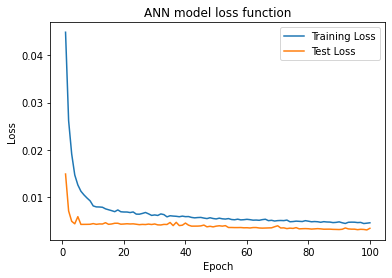

In [29]:
ann_training_loss = annTraining.history['loss']
ann_test_loss = annTraining.history['val_loss']
epoch_count = range(1, len(ann_training_loss) + 1)
print(ann_training_loss[-1])
print(ann_test_loss[-1])


# Visualize loss history
plt.plot(epoch_count, ann_training_loss)
plt.plot(epoch_count, ann_test_loss)
plt.legend(['Training Loss', 'Test Loss'])
plt.title("ANN model loss function")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

**ANN predict result(using training data)**

In [30]:
ypred = ann.predict(xtrain).reshape(ytrain.shape[0],)

88/88 [==============================] - 0s 1ms/step


In [31]:
# rever normalizaed data to actual data
ypredTem = min_max_scaler.inverse_transform(ypred.reshape(1, -1)).flatten()
ytrainTem = min_max_scaler.inverse_transform(ytrain.reshape(1, -1)).flatten()

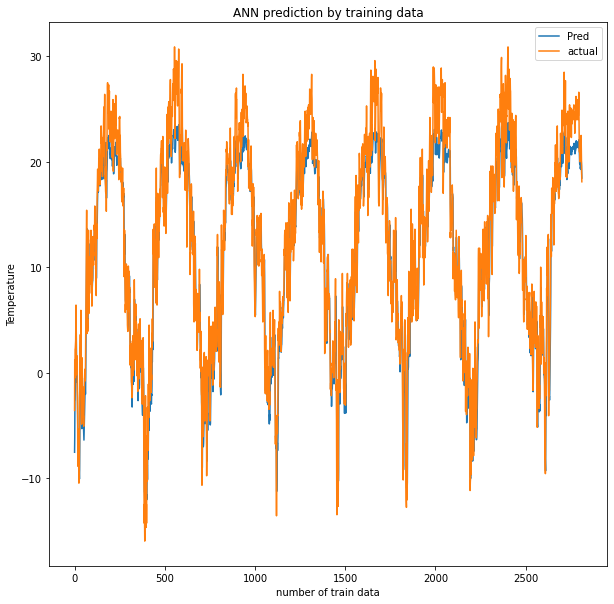

In [32]:
# Visualize
plt.figure(figsize=(10,10))
plt.plot(ypredTem)
plt.plot(ytrainTem)
plt.legend(['Pred', 'actual'])
plt.title("ANN prediction by training data")
plt.xlabel('number of train data')
plt.ylabel('Temperature')
plt.show();

**ANN predict result(using testing data)**

In [33]:
ypred = ann.predict(xtest).reshape(ytest.shape[0],)

25/25 [==============================] - 0s 1ms/step


In [34]:
# rever normalizaed data to actual data
ypredTem = min_max_scaler.inverse_transform(ypred.reshape(1, -1)).flatten()
ytestTem = min_max_scaler.inverse_transform(ytest.reshape(1, -1)).flatten()

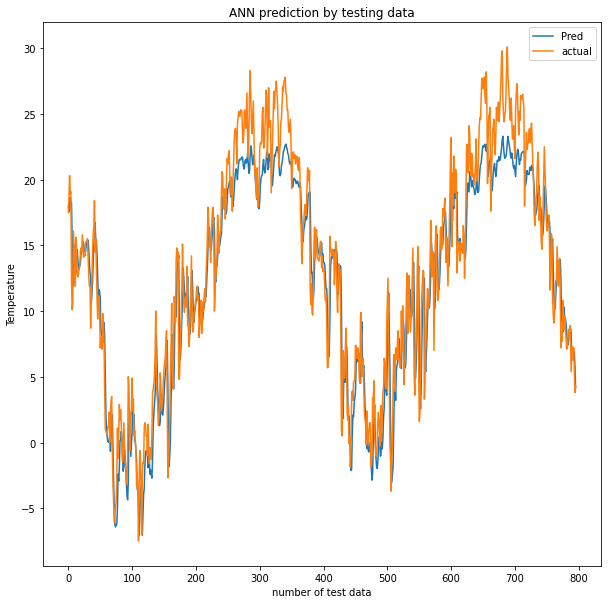

In [35]:
plt.figure(figsize=(10,10))
plt.plot(ypredTem)
plt.plot(ytestTem)
plt.legend(['Pred', 'actual'])
plt.title("ANN model predict")
plt.title("ANN prediction by testing data")
plt.xlabel('number of test data')
plt.ylabel('Temperature')
plt.show();

In [36]:
rmse = mean_squared_error(ytestTem,ypredTem) ** 0.5
r2 = r2_score(ytestTem,ypredTem)
print('RMSE :',rmse)
print('R2 Score :',r2)

RMSE : 2.776552216867161
R2 Score : 0.8958278261374998


### LSTM test

In [37]:
lstm = Sequential(
                    [
                        layers.LSTM(256,activation='sigmoid',return_sequences=True,input_shape=(7,1)),
                        # layers.LSTM(256,activation='tanh',return_sequences=True,input_shape=(7,1)),
                        # layers.LSTM(256,activation='tanh',return_sequences=True,input_shape=(7,1)),
                        layers.Flatten(),
                        layers.Dropout(rate=0.4),
                        layers.Dense(1,activation='sigmoid')
                    ]
                )

lstm.summary()
lstm.compile(loss='mean_squared_error',optimizer='adam',metrics=[RootMeanSquaredError()])
lstmTraining = lstm.fit(xtrain.reshape(xtrain.shape[0],7,1),ytrain,
                    validation_data=(xtest.reshape(xtest.shape[0],7,1),ytest),
                    epochs=100)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 256)            264192    
                                                                 
 flatten (Flatten)           (None, 1792)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1792)              0         
                                                                 
 dense_4 (Dense)             (None, 1)                 1793      
                                                                 
Total params: 265,985
Trainable params: 265,985
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
88/88 [==============================] - 5s 38ms/step - loss: 0.0520 - root_mean_squared_error: 0.2280 - val_loss: 0.0357 - val_root_mean_squared_error: 0.1888
Epoch 2/

0.004110654350370169
0.00306844268925488


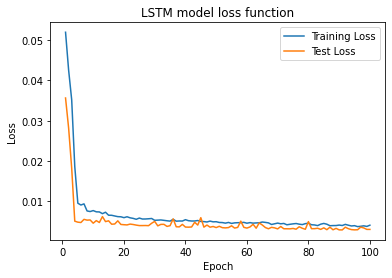

In [38]:
lstm_training_loss = lstmTraining.history['loss']
lstm_test_loss = lstmTraining.history['val_loss']
epoch_count = range(1, len(lstm_training_loss) + 1)
print(lstm_training_loss[-1])
print(lstm_test_loss[-1])
# Visualize loss history
plt.plot(epoch_count, lstm_training_loss)
plt.plot(epoch_count, lstm_test_loss)
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.title("LSTM model loss function")
plt.ylabel('Loss')
plt.show();

**LSTM and ANN loss curve**

ann_training_loss  0.004667176865041256
ann_test_loss  0.0035048220306634903
lstm_training_loss  0.004110654350370169
lstm_test_loss  0.00306844268925488


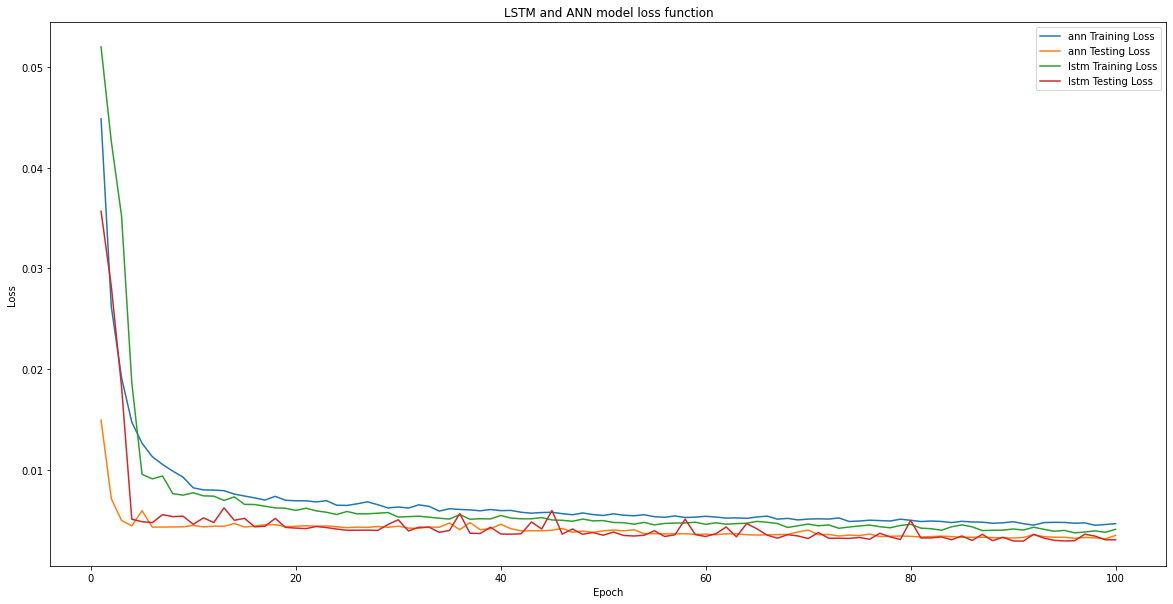

In [39]:
ann_training_loss = annTraining.history['loss']
ann_test_loss = annTraining.history['val_loss']
epoch_count = range(1, len(ann_training_loss) + 1)
print('ann_training_loss ',ann_training_loss[-1])
print('ann_test_loss ', ann_test_loss[-1])



lstm_training_loss = lstmTraining.history['loss']
lstm_test_loss = lstmTraining.history['val_loss']
print('lstm_training_loss ',lstm_training_loss[-1])
print('lstm_test_loss ', lstm_test_loss[-1])
# Visualize loss history
plt.figure(figsize=(20,10))

plt.plot(epoch_count, ann_training_loss)
plt.plot(epoch_count, ann_test_loss)
plt.plot(epoch_count, lstm_training_loss)
plt.plot(epoch_count, lstm_test_loss)
plt.legend(['ann Training Loss', 'ann Testing Loss','lstm Training Loss','lstm Testing Loss'])
plt.xlabel('Epoch')
plt.title("LSTM and ANN model loss function")
plt.ylabel('Loss')
plt.show();

**LSTM predict result(using training data)**

In [40]:
ypred = lstm.predict(xtrain.reshape(xtrain.shape[0],7,1)).reshape(ytrain.shape[0],)

88/88 [==============================] - 2s 14ms/step


In [41]:
# rever normalizaed data to actual data
ypredTem = min_max_scaler.inverse_transform(ypred.reshape(1, -1)).flatten()
ytrainTem = min_max_scaler.inverse_transform(ytrain.reshape(1, -1)).flatten()

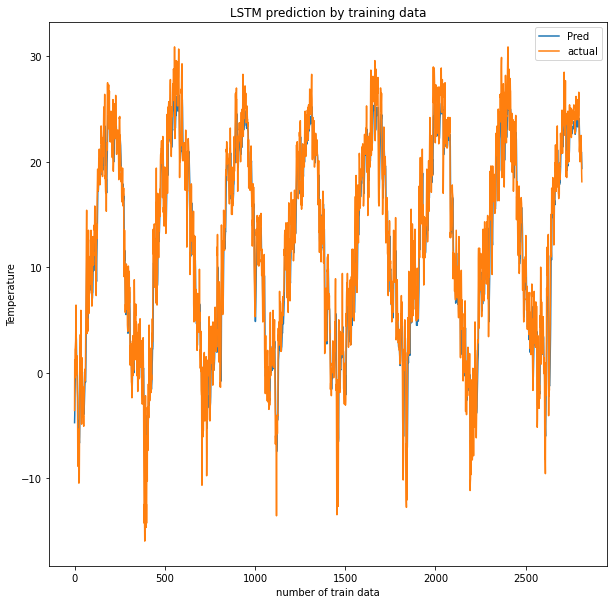

In [42]:
plt.figure(figsize=(10,10))
plt.plot(ypredTem)
plt.plot(ytrainTem)
plt.legend(['Pred', 'actual'])
plt.title("LSTM prediction by training data")
plt.xlabel('number of train data')
plt.ylabel('Temperature')
plt.show();

**LSTM predict result(using testing data)**

In [43]:
ypred = lstm.predict(xtest.reshape(xtest.shape[0],7,1)).reshape(ytest.shape[0],)

25/25 [==============================] - 0s 9ms/step


In [44]:
# rever normalizaed data to actual data
ypredTem = min_max_scaler.inverse_transform(ypred.reshape(1, -1)).flatten()
ytestTem = min_max_scaler.inverse_transform(ytest.reshape(1, -1)).flatten()

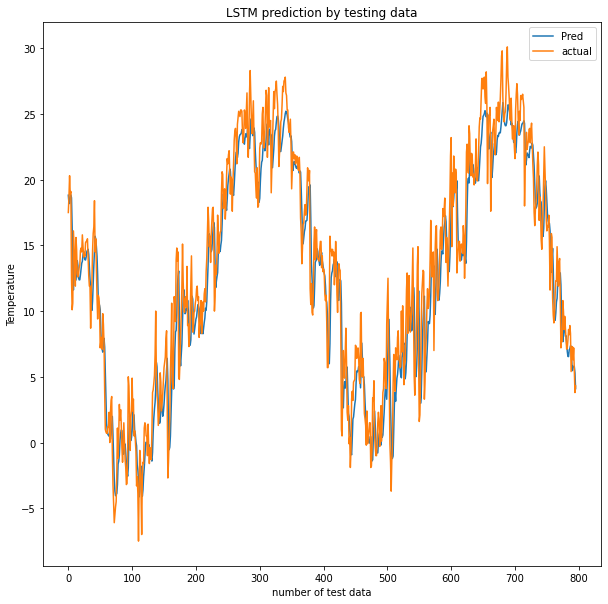

In [45]:
plt.figure(figsize=(10,10))
plt.plot(ypredTem)
plt.plot(ytestTem)
plt.legend(['Pred', 'actual'])
plt.title("LSTM prediction by testing data")
plt.xlabel('number of test data')
plt.ylabel('Temperature')
plt.show();

In [46]:
rmse = mean_squared_error(ytestTem,ypredTem) ** 0.5
r2 = r2_score(ytestTem,ypredTem)
mae = mean_absolute_error(ytestTem,ypredTem)
print('RMSE :',rmse)
print('R2 Score :',r2)

RMSE : 2.5979563565333397
R2 Score : 0.9087981310109136


**Forecasted Results**

In [47]:
actual_value = df_validation['Temperature'].values
actual_value

array([ 5.3,  4.1,  2.4,  1.2, -0.4,  1.3,  0.8,  0.8,  0.7,  1.9,  7. ,
        9.7,  4.1,  0.4, -0.6, -0.8,  2.1,  3.5,  3.6,  4.4,  5.7,  5.2,
        5.2,  4.1,  3.5,  3.1,  3.3,  3.2,  3.3,  4. ,  5.1,  6.7,  4.4,
        2.1,  9.3,  6.9,  6.1,  6.7,  5.7,  3.8,  6.9,  8.9,  8.1,  5.2,
        6.5,  3.3,  2. ,  1.4,  0.4,  0.8,  0.4, -0.8, -2. , -3.5, -5. ,
       -6.1, -6.5, -1.3,  2.4,  3.3,  5.6,  6.4,  4.3,  1.2,  0.2, -0.4,
       -0.9,  3. ,  2.5,  1.5,  2.7,  4. ,  6.9,  6.9,  3.4,  1.3,  4.4,
        9. , 10.7,  8.8, -1.9, -4.6, -1.9,  0.1, -2.6, -1.3,  2.7, -2.5,
       -0.3,  3.8,  2.8,  3.1,  3. ,  7.7, 11.6,  9. ,  7. ,  4.3,  6.7,
        6.8,  8.2, 10.5,  3.5,  3.4,  4.2,  3.8,  0.9, -0.1,  0.7,  4. ,
        7.7,  7.5,  5.3,  5.1,  4.9,  3.9,  3.9,  4.6,  2.1,  3.4,  1.9,
        3.5,  7.4,  8.8, 11.2,  9.9,  9.6,  9.6, 10.4, 12.8,  9.8,  8. ,
        7.3,  9.4,  6.5,  5.5,  6.2,  8.4,  9.3, 12. , 14.3,  9.3,  8.7,
        8.1,  8.3,  8.5,  9.8, 10.1, 11.5, 12.9, 13

In [48]:
actual_value_scaler = min_max_scaler.fit_transform(actual_value.reshape(-1,1)).flatten()
actual_value_scaler

array([0.31891892, 0.28648649, 0.24054054, 0.20810811, 0.16486486,
       0.21081081, 0.1972973 , 0.1972973 , 0.19459459, 0.22702703,
       0.36486486, 0.43783784, 0.28648649, 0.18648649, 0.15945946,
       0.15405405, 0.23243243, 0.27027027, 0.27297297, 0.29459459,
       0.32972973, 0.31621622, 0.31621622, 0.28648649, 0.27027027,
       0.25945946, 0.26486486, 0.26216216, 0.26486486, 0.28378378,
       0.31351351, 0.35675676, 0.29459459, 0.23243243, 0.42702703,
       0.36216216, 0.34054054, 0.35675676, 0.32972973, 0.27837838,
       0.36216216, 0.41621622, 0.39459459, 0.31621622, 0.35135135,
       0.26486486, 0.22972973, 0.21351351, 0.18648649, 0.1972973 ,
       0.18648649, 0.15405405, 0.12162162, 0.08108108, 0.04054054,
       0.01081081, 0.        , 0.14054054, 0.24054054, 0.26486486,
       0.32702703, 0.34864865, 0.29189189, 0.20810811, 0.18108108,
       0.16486486, 0.15135135, 0.25675676, 0.24324324, 0.21621622,
       0.24864865, 0.28378378, 0.36216216, 0.36216216, 0.26756

In [49]:
def prediction(x,n_days=7, algo='ann'):
    x = list(x)
    forecasted = []
    
    if algo == 'ann' :
        for i in range(n_days):
            forcast = ann.predict(np.array([x[-7:]]))[0][0] 
            forecasted.append(forcast)
            x.append(actual_value_scaler[i])

    
    elif algo == 'lstm' :
        for i in range(n_days):
            forcast = lstm.predict(np.array([x[-7:]]).reshape(1,7,1))[0][0]
            forecasted.append(forcast)
            x.append(actual_value_scaler[i])
            
    return np.array(forecasted)


In [50]:
ann_forecast = prediction(xtest[-1] + ytest[-1],df_validation.shape[0], 'ann')
ann_forecast.shape

1/1 [==============================] - 0s 21ms/step


(403,)

In [51]:
df_validation.shape

(403, 2)

In [52]:
# rever normalizaed data to actual data
ann_forecast_2d = ann_forecast.reshape(-1,1)
ann_forecast_normal = min_max_scaler.inverse_transform(ann_forecast_2d)
ann_forecast_normal


array([[23.15644   ],
       [13.782527  ],
       [ 8.125405  ],
       [ 4.739405  ],
       [ 2.8710816 ],
       [ 0.9492681 ],
       [ 0.9112503 ],
       [-0.02551506],
       [-0.14072369],
       [-0.3038931 ],
       [ 0.21156682],
       [ 3.2927454 ],
       [ 6.5006704 ],
       [ 3.85841   ],
       [ 0.8993622 ],
       [-0.44170344],
       [-0.8646083 ],
       [ 0.4307571 ],
       [ 1.5957046 ],
       [ 1.8082483 ],
       [ 2.3004334 ],
       [ 3.3532376 ],
       [ 3.5076632 ],
       [ 3.7151136 ],
       [ 3.111746  ],
       [ 2.5515716 ],
       [ 2.1485372 ],
       [ 2.1474423 ],
       [ 2.0280075 ],
       [ 2.0285935 ],
       [ 2.3840818 ],
       [ 3.180428  ],
       [ 4.5106897 ],
       [ 3.522361  ],
       [ 1.8244942 ],
       [ 5.782965  ],
       [ 5.711422  ],
       [ 5.220817  ],
       [ 5.3959765 ],
       [ 4.75699   ],
       [ 3.3233018 ],
       [ 5.0998416 ],
       [ 6.8956866 ],
       [ 7.013382  ],
       [ 5.0593066 ],
       [ 5

In [53]:
ann_future_tem = ann_forecast_normal.flatten()
ann_future_tem

array([23.15644   , 13.782527  ,  8.125405  ,  4.739405  ,  2.8710816 ,
        0.9492681 ,  0.9112503 , -0.02551506, -0.14072369, -0.3038931 ,
        0.21156682,  3.2927454 ,  6.5006704 ,  3.85841   ,  0.8993622 ,
       -0.44170344, -0.8646083 ,  0.4307571 ,  1.5957046 ,  1.8082483 ,
        2.3004334 ,  3.3532376 ,  3.5076632 ,  3.7151136 ,  3.111746  ,
        2.5515716 ,  2.1485372 ,  2.1474423 ,  2.0280075 ,  2.0285935 ,
        2.3840818 ,  3.180428  ,  4.5106897 ,  3.522361  ,  1.8244942 ,
        5.782965  ,  5.711422  ,  5.220817  ,  5.3959765 ,  4.75699   ,
        3.3233018 ,  5.0998416 ,  6.8956866 ,  7.013382  ,  5.0593066 ,
        5.224725  ,  3.200015  ,  1.9288634 ,  1.1116436 ,  0.24100964,
        0.02610166, -0.22389819, -0.98123276, -1.7338562 , -2.5189865 ,
       -3.2373817 , -3.745294  , -4.026786  , -2.8240004 , -0.865625  ,
        0.43037003,  2.217979  ,  3.494507  ,  2.8087335 ,  1.0625542 ,
        0.06740277, -0.5495351 , -0.9515281 ,  0.6793505 ,  0.92

In [54]:
index_day = range(1,31)
index_day

range(1, 31)

In [55]:
lstm_forecast = prediction(xtest[-1] + ytest[-1],df_validation.shape[0], 'lstm')
lstm_forecast

1/1 [==============================] - 0s 23ms/step


array([0.85637987, 0.6922777 , 0.49089563, 0.36974272, 0.32128802,
       0.26363114, 0.25801817, 0.23386666, 0.23431572, 0.22897406,
       0.23892237, 0.28416297, 0.345655  , 0.3250549 , 0.26726025,
       0.23044558, 0.2189072 , 0.23758645, 0.26175   , 0.2709165 ,
       0.2776909 , 0.2958041 , 0.30204597, 0.30589142, 0.29687098,
       0.28674236, 0.2767639 , 0.276197  , 0.27351233, 0.27395117,
       0.27869675, 0.2921601 , 0.31461668, 0.30701077, 0.2785419 ,
       0.32329786, 0.34401587, 0.34124887, 0.33316374, 0.3319266 ,
       0.3025339 , 0.3241598 , 0.35575894, 0.36959428, 0.34091914,
       0.33439663, 0.30319175, 0.27950948, 0.25711814, 0.2437083 ,
       0.2346728 , 0.23137882, 0.21844068, 0.20215963, 0.18529835,
       0.16801539, 0.15473707, 0.14723755, 0.17484802, 0.21469094,
       0.24630159, 0.27537224, 0.30118504, 0.29565954, 0.26392418,
       0.24061832, 0.22511595, 0.21703243, 0.24195738, 0.25210848,
       0.24836472, 0.24961874, 0.26730198, 0.30105993, 0.32625

In [56]:
lstm_forecast_2d = lstm_forecast.reshape(-1,1)
reverseData = min_max_scaler.inverse_transform(lstm_forecast_2d)
reverseData

array([[25.186054  ],
       [19.114275  ],
       [11.663137  ],
       [ 7.1804805 ],
       [ 5.3876567 ],
       [ 3.254352  ],
       [ 3.046672  ],
       [ 2.1530664 ],
       [ 2.1696818 ],
       [ 1.9720402 ],
       [ 2.3401277 ],
       [ 4.01403   ],
       [ 6.2892346 ],
       [ 5.527032  ],
       [ 3.3886294 ],
       [ 2.0264864 ],
       [ 1.5995667 ],
       [ 2.2906988 ],
       [ 3.1847506 ],
       [ 3.5239103 ],
       [ 3.7745628 ],
       [ 4.444752  ],
       [ 4.675701  ],
       [ 4.8179827 ],
       [ 4.484226  ],
       [ 4.1094675 ],
       [ 3.7402637 ],
       [ 3.7192886 ],
       [ 3.6199563 ],
       [ 3.6361935 ],
       [ 3.8117795 ],
       [ 4.3099236 ],
       [ 5.140817  ],
       [ 4.8593984 ],
       [ 3.80605   ],
       [ 5.462021  ],
       [ 6.228587  ],
       [ 6.1262083 ],
       [ 5.8270583 ],
       [ 5.781285  ],
       [ 4.693754  ],
       [ 5.4939127 ],
       [ 6.6630807 ],
       [ 7.1749883 ],
       [ 6.114008  ],
       [ 5

In [57]:
lstm_future_tem = reverseData.flatten()
lstm_future_tem

array([25.186054  , 19.114275  , 11.663137  ,  7.1804805 ,  5.3876567 ,
        3.254352  ,  3.046672  ,  2.1530664 ,  2.1696818 ,  1.9720402 ,
        2.3401277 ,  4.01403   ,  6.2892346 ,  5.527032  ,  3.3886294 ,
        2.0264864 ,  1.5995667 ,  2.2906988 ,  3.1847506 ,  3.5239103 ,
        3.7745628 ,  4.444752  ,  4.675701  ,  4.8179827 ,  4.484226  ,
        4.1094675 ,  3.7402637 ,  3.7192886 ,  3.6199563 ,  3.6361935 ,
        3.8117795 ,  4.3099236 ,  5.140817  ,  4.8593984 ,  3.80605   ,
        5.462021  ,  6.228587  ,  6.1262083 ,  5.8270583 ,  5.781285  ,
        4.693754  ,  5.4939127 ,  6.6630807 ,  7.1749883 ,  6.114008  ,
        5.8726754 ,  4.718095  ,  3.841851  ,  3.013371  ,  2.5172071 ,
        2.1828935 ,  2.0610166 ,  1.5823052 ,  0.97990626,  0.3560391 ,
       -0.28343055, -0.7747284 , -1.0522105 , -0.03062326,  1.4435648 ,
        2.613159  ,  3.6887727 ,  4.6438465 ,  4.439403  ,  3.2651947 ,
        2.4028778 ,  1.8292904 ,  1.5302    ,  2.452423  ,  2.82

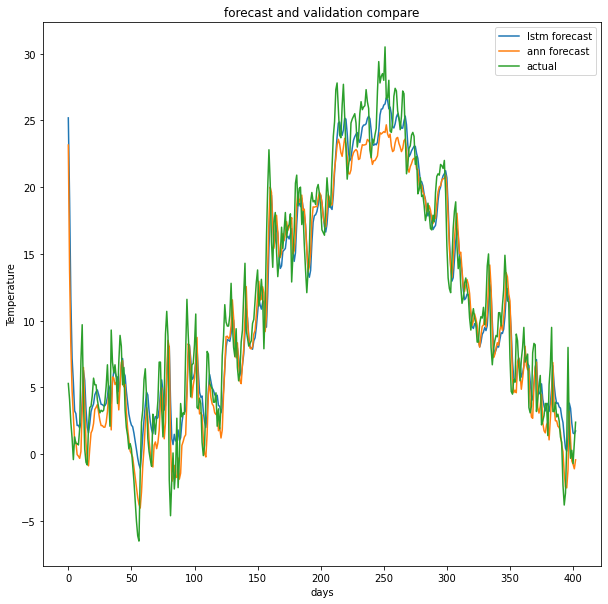

In [64]:
plt.figure(figsize=(10,10))
plt.plot(lstm_future_tem)
plt.plot(ann_future_tem)
plt.plot(actual_value)
plt.legend(['lstm forecast','ann forecast', 'actual'])

plt.title("forecast and validation compare")
plt.xlabel('days')
plt.ylabel('Temperature')
plt.show();